In [1]:
#Run from here
import numpy as np
import pandas as pd

import csv 
import requests 
import xml.etree.ElementTree as ET 
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.text import Text

import numpy as np
import pandas as pd
import warnings
import nltk
import re
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.text import Text
import gensim
from tqdm import tqdm
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("Necessary Imports Complete! ")

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Necessary Imports Complete! 


In [2]:
# If executing in Google Colab
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle
temp = pickle.load(open("/content/drive/My Drive/New Data/data.pkl", 'rb'))

In [4]:
temp.shape

(4946, 3)

In [5]:
!pip install pypyodbc

  Created wheel for pypyodbc: filename=pypyodbc-1.3.4-cp36-none-any.whl size=22843 sha256=d1aeff15117c928d9541292e2811d70b8c4d9b497cf2b1c4fa18e6b3f29fb1d2
  Stored in directory: /root/.cache/pip/wheels/e4/92/18/b21aa15a7e8915859a6fc10206cdd7f5d9ac098a523b9738c6
Successfully built pypyodbc


In [6]:
import os
import pypyodbc

loc = '/content/drive/My Drive/New Data/Fulldocs-new'
os.chdir(loc)
filelist = os.listdir()
#print (len((pd.concat([pd.read_csv(item, names=[item[:-4]]) for item in filelist],axis=1))))

data = []
path = loc
files = [f for f in os.listdir(path) if os.path.isfile(f)]
for f in files:
    with open(f,'r') as myfile:
        data.append(myfile.read())
        
df = pd.DataFrame(data)
print (df.shape)

(50, 1)


In [7]:
df.tail()

,0
45,Leave granted.\n1. The State of Manipur is in ...
46,1. In these appeals the dispute relates to pay...
47,"1. Aggrieved by the decision of Customs, Exci..."
48,"1. Ujjagar Singh, the appellant herein, a res..."
49,1. Leave granted.\n2. Challenge in this appea...


In [8]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have", "civil appellate jurisdiction: civil appeal no." : "", 
                           "appeal allowed. liiofindia: copyright policy | disclaimers | privacy policy | feedback url:" : "", 
                           "http://www.liiofindia.org/in/cases/cen/insc/" : "", ".htmlappeal allowed." : "", "civil appeal": "",
                       "appeal allowed. liiofindia copyright policy disclaimers privacy policy feedback url http www.liiofindia.org cases cen insc": "", ".htmlappeal allowed.": "", "ref.":"reference", "no.": "number",
                       "u.p.": "uttar pradesh", "civil appellate jurisdiction": ""}

#stopwrds = set(stopwords.words('english')) 
stopwrds = (stopwords.words('english')) 

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^\.a-zA-Z]", " ", newString)  ### to modify to include full stops
    
    tokens = [w for w in newString.split() if not w in stopwrds]
    long_words=[]
    for i in tokens:
        if len(i)>=1:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

data_pickle_np = np.array(temp)

cleaned_full_sent = []
for t in tqdm(data_pickle_np[:4946,1]):
    cleaned_full_sent.append(text_cleaner(t[56:-468]))

cleaned_summ_sent = []
for t in tqdm(data_pickle_np[:4946,0]):
    cleaned_summ_sent.append(text_cleaner(t[14:-110]))

test_pickle_np = np.array(df)
test_sent = []
for t in tqdm(test_pickle_np[:50,0]):
    test_sent.append(text_cleaner(t))

100%|██████████| 50/50 [00:00<00:00, 79.90it/s]


In [9]:
# Sentence tokenization and tagging of document number t sentences

# temp = data_
set = len(cleaned_summ_sent)
# set = np.arange(0, 51, 1)
# set = [0, 1, 2]

full_sent = pd.DataFrame()
summ_sent = pd.DataFrame()

full_docs = []
summ_docs = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(set):
    full = cleaned_full_sent[i]
    summary = cleaned_summ_sent[i]

    v = sent_tokenize(full)    
    # t1 = pd.DataFrame(v)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t1 = pd.DataFrame(v1)

    try:
        v = sent_tokenize(summary)
        v1 = []
        for b in v:
          if len(b)>20:
            v1.append(b)
        t2 = pd.DataFrame(v1)
    except:
        pass

    t3 = np.linspace(i, i, num = len(t1))
    t4 = np.linspace(i, i, num = len(t2))

    full_docs = np.append(full_docs, t3)
    summ_docs = np.append(summ_docs, t4)

    full_sent = pd.concat([full_sent, t1], ignore_index = True)
    summ_sent = pd.concat([summ_sent, t2], ignore_index = True)
    # print(t1)
    #print(i)
# -----------------------------------------------------------------------------------------------------------------------------

#print('summary sentence tokenization')
#print(len(summ_docs))
print(len(summ_sent))
#print(len(full_docs))
print(len(full_sent))

# summ_sent_mod = summ_sent.set_axis(['Sentences'], axis=1, inplace=False)
# full_sent_mod = full_sent.set_axis(['Sentences'], axis=1, inplace=False)

# -----------------------------------------------------------------------------------------------------------------------------

133358
613890


In [10]:
set = len(test_sent)
gs_sent = pd.DataFrame()
gs_docs = []

for i in range(set):
    test_s = test_sent[i]

    v = sent_tokenize(test_s)    
    # t1 = pd.DataFrame(v)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t1 = pd.DataFrame(v1)

    t3 = np.linspace(i, i, num = len(t1))

    gs_docs = np.append(gs_docs, t3)

    gs_sent = pd.concat([gs_sent, t1], ignore_index = True)
    
    # print(t1)
    #print(i)
# -----------------------------------------------------------------------------------------------------------------------------

#print('summary sentence tokenization')
#print(len(summ_docs))
print(len(gs_sent))


8916


In [12]:
tmp = pd.DataFrame(gs_sent)
tmp.columns = ['Sentences']
tmp['doc_id'] = gs_docs
tmp

,Sentences,doc_id
0,three civil appeals stemming three revision pe...,0.0
1,high court deciding various issues remanded ca...,0.0
2,shri achutananda purohit appellant intermediar...,0.0
3,estate vested state april force act crucial qu...,0.0
4,appellant received around rs.,0.0
...,...,...
8911,constitution capable exercised prayer made beh...,49.0
8912,view stated high court justified holding lette...,49.0
8913,addition bare reading court earlier order show...,49.0
8914,impugned order set aside.,49.0


In [0]:
tmp.to_pickle("/content/drive/My Drive/Anadi_Basak_with_vocab/data/gs_sent.pickle")

In [0]:
dictt = pd.read_csv('/content/drive/My Drive/New Data/vocabulary.csv', header=None)
dictt.columns = ['vocab']
vocab = list(dictt.vocab)

In [0]:
combined = pd.concat([full_sent, summ_sent], axis = 0, ignore_index=True, sort = False)
print(combined.shape)

(747248, 1)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfm
from nltk.tokenize import RegexpTokenizer
import scipy

# -----------------------------------------------------------------------------------------------------------------------------

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf_func = tfm(vocabulary = vocab)
tfidf = tfidf_func.fit_transform(combined.iloc[:,0])
tfidf_test = tfidf_func.fit_transform(gs_sent.iloc[:,0])


In [0]:
from sklearn.decomposition import PCA, TruncatedSVD

dim = 200

svd = TruncatedSVD(dim)
b = svd.fit_transform(tfidf)
#print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
# del tfidf

print(b.shape)

c= svd.fit_transform(tfidf_test)



0.8177504309645893
(747248, 200)


In [0]:
x_train = pd.DataFrame(b)
x_test = pd.DataFrame(c)


summ_tfidf = x_train.iloc[:len(summ_sent),:]
full_tfidf = x_train.iloc[len(summ_sent):len(summ_sent)+len(full_sent),:]
gs_tfidf = x_test

In [0]:
summ_tfidf['doc_id'] = summ_docs
full_tfidf['doc_id'] = full_docs
gs_tfidf['doc_id'] = gs_docs
summ_tfidf.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,doc_id
133353,0.012283,0.001360,0.011341,0.008764,0.002107,0.006337,0.001385,-0.000699,0.010600,0.001253,0.012566,0.007000,0.000672,0.004811,0.000492,-0.005464,-0.002903,-0.003603,0.007567,0.010097,0.009703,-0.002680,0.004967,0.010067,-0.001554,0.027003,0.019172,0.018140,0.049067,0.010364,0.016901,0.013990,-0.002844,0.001314,0.006980,0.001846,-0.000355,0.000791,0.004888,-0.000521,...,0.002979,-0.003501,-0.005882,-0.004135,0.004572,-0.011264,0.001963,0.003408,-0.004197,-0.002852,-0.013031,-0.000471,0.000775,-0.017773,-0.036391,-0.029771,0.017736,0.012577,-0.000656,-0.004139,0.005625,-0.003319,-0.002008,-0.000627,0.009714,0.000674,-0.000740,0.000487,-0.003760,-0.015263,-0.030947,0.002891,-0.005694,0.006627,-0.003425,-0.003725,-0.000825,-0.000970,0.002511,4945.0
133354,0.085687,0.028934,0.115725,0.326957,-0.166818,-0.048840,-0.018838,-0.002807,-0.011730,-0.006804,0.051953,0.049889,-0.022298,-0.013371,0.286014,-0.167771,0.053027,0.066063,-0.261062,0.089209,0.007510,-0.026374,-0.039251,-0.108948,-0.025432,-0.005446,-0.017396,-0.005552,-0.001190,-0.013585,-0.001813,-0.000177,-0.010159,-0.002747,-0.012480,-0.008667,0.001835,0.002046,-0.020877,0.005938,...,-0.001843,0.004553,-0.001588,0.002977,0.001555,-0.002296,0.000084,-0.003180,-0.005002,0.003978,-0.010041,0.008373,0.006518,-0.010001,0.016334,0.004759,-0.002193,-0.008845,-0.009481,-0.002964,0.002828,0.012261,-0.015116,-0.015025,0.013574,-0.013933,-0.007844,-0.008589,-0.003970,0.025848,-0.024570,-0.003683,0.004529,-0.003101,0.002502,0.012791,0.008521,-0.065946,-0.032418,4945.0
133355,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,4945.0
133356,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,4945.0
133357,0.045880,0.001910,0.032325,0.033113,0.019695,0.017105,0.053693,-0.056188,0.066207,-0.015024,0.166644,0.145896,-0.052173,-0.028987,0.626009,-0.371095,0.118994,0.145157,-0.528441,0.179219,0.022725,-0.048632,-0.087743,-0.180239,-0.051222,0.016224,-0.020658,-0.014839,-0.001243,-0.026765,0.000961,-0.000514,-0.016112,0.000650,-0.018086,-0.020655,0.006653,0.005046,-0.035552,0.010510,...,-0.000927,-0.000058,-0.001143,-0.000463,0.002115,-0.000837,-0.002926,-0.004918,-0.001358,-0.000947,-0.003918,-0.003721,0.000683,0.000179,-0.002241,0.000717,0.004818,-0.001931,0.005211,-0.002237,0.000222,-0.002883,-0.001100,-0.002864,-0.000517,-0.001575,-0.000043,0.001182,-0

In [0]:
gs_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,doc_id
0,0.582229,-0.022812,0.029571,0.104435,-0.342824,-0.217215,-0.043519,-0.139129,-0.071967,-0.097601,0.012222,-0.074849,-0.091527,0.008149,-0.044739,0.005636,0.084106,-0.042578,-0.034754,0.011962,-0.129181,-0.023417,-0.084927,0.094902,-0.108585,-0.016976,-0.164218,-0.155712,-0.117728,0.034345,0.009389,-0.103299,-0.022938,0.015384,0.035760,-0.059121,-0.107170,-0.001243,-0.008711,0.071527,...,0.001240,0.000701,0.006743,-0.003039,0.001362,0.000419,-0.002126,-0.002105,-0.000684,-0.002378,-0.001823,0.000292,-0.000671,0.001824,0.003959,0.002839,0.004006,0.004180,-0.000100,0.006421,-0.002218,-0.004020,-0.006418,-0.005491,-0.002279,0.007070,0.000933,0.003214,-0.001311,-0.002594,-0.001760,-0.003473,-0.005856,0.000026,0.002482,0.005617,-0.005828,-0.006041,-0.001273,0.0
1,0.293162,0.135495,0.013146,0.077813,-0.210428,-0.146933,-0.067296,-0.117620,-0.063736,-0.024496,0.004059,-0.087178,0.008428,0.041812,-0.020935,0.002688,-0.020702,-0.042141,0.031483,0.007118,-0.005477,-0.023902,-0.026455,0.018626,-0.030812,0.141433,-0.198189,0.055297,0.380050,-0.079053,-0.038438,-0.137465,0.009724,0.003575,-0.023695,0.085197,0.024190,0.047146,-0.095951,0.035028,...,-0.005419,-0.003023,-0.004396,-0.038002,-0.015798,-0.015629,0.003462,0.019514,0.001325,-0.003474,-0.011600,0.005240,0.004791,-0.005199,-0.002820,0.002865,-0.001388,-0.006415,0.002210,-0.004791,0.000024,0.004440,-0.000820,0.003786,-0.004357,-0.005914,0.000329,0.004383,0.002001,-0.004177,-0.001680,0.004663,-0.003823,-0.000353,0.000175,0.006186,-0.007458,0.001903,-0.002434,0.0
2,0.103024,0.215376,-0.295860,0.226316,-0.089913,-0.217561,-0.007697,-0.172000,-0.026823,-0.016685,0.014031,-0.065254,-0.002264,0.027106,0.032231,-0.026252,-0.019547,-0.034589,0.004126,0.022556,-0.026413,-0.063615,-0.001189,0.002634,0.014592,0.021257,-0.043030,-0.003045,0.076636,0.040699,-0.028534,0.038467,0.026140,0.010103,0.008762,0.006851,-0.073901,-0.066104,-0.073592,-0.052751,...,-0.006695,-0.017079,-0.002643,-0.001701,0.002989,0.002560,0.019354,0.006631,-0.001797,-0.007087,-0.010541,-0.011082,-0.018576,0.013364,0.018552,-0.002269,-0.004886,-0.001145,-0.010309,0.008228,-0.001946,0.003496,0.001003,-0.009681,-0.009290,-0.003976,0.006666,0.023242,0.018492,0.005036,0.000342,-0.006316,0.007476,-0.006114,-0.013353,-0.011409,-0.009467,-0.011128,0.026258,0.0
3,0.195938,0.333158,0.425305,-0.067638,-0.031987,-0.176290,-0.143201,-0.034098,-0.102015,-0.019963,-0.011916,-0.021978,-0.031245,-0.005176,0.017140,-0.022300,-0.016406,-0.018126,0.009987,0.026884,-0.002312,-0.033635,-0.028962,0.012492,-0.004265,0.032430,-0.086877,0.030679,0.169363,0.024958,0.006534,-0.056157,0.043973,-0.037113,-0.013285,0.074929,-0.036485,-0.060199,-0.117293,-0.000894,...,-0.004793,-0.011176,0.013777,-0.045406,-0.012916,-0.013964,0.005027,0.011889,-0.014052,-0.004918,-0.002199,0.001356,-0.001946,0.023177,0.023471,0.018268,0.045785,0.015803,-0.001214,0.007160,-0.027683,0.051785,0.018349,0.003483,-0.002351,0.019740,-0.000221,-0.044280,0.052860,-0.000591,0.000462,0.000985,0.111632,0.033470,0.000750,-0.053225,-0.030739,-0.026228,-0.028575,0.0
4,0.179119,0.382034,-0.551646,0.410720,-0.176699,-0.412920,-0.020247,-0.313174,-0.061624,-0.029634,0.006733,-0.115353,-0.064149,0.031631,0.006060,-0.020635,-0.008979,-0.066554,0.022527,0.005210,-0.079366,-0.029011,0.020276,0.002131,0.026178,0.033479,0.025609,-0.014682,-0.011302,-0.047772,-0.007856,0.009669,0.004803,0.004008,-0.002177,0.001821,0.005349,-0.016835,0.002023,-0.008745,...,0.006788,-0.004001,-0.008928,0.000399,0.001893,0.001188,0.002685,0.004350,0.000292,0.000498,-0.002790,0.000926,0.000180,0.000952,0.002605,0.003200,-0.003825,-0.005780,0.003440,0.001316,-0.000177,-0.003025,0.001307,0.001033,-0.001116,-0.001591,-0.003336,0.008738,0.001969,0

In [0]:
from sklearn import preprocessing

# -----------------------------------------------------------------------------------------------------------------------------

summ_tfidf_normalized = preprocessing.normalize(summ_tfidf.drop(['doc_id'], axis=1), norm='l2')
summ_tfidf_normalized = pd.DataFrame(summ_tfidf_normalized)
summ_tfidf_normalized.columns = summ_tfidf.drop(['doc_id'], axis=1).columns
summ_tfidf_normalized['doc_id'] = np.array(summ_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------

full_tfidf_normalized = preprocessing.normalize(full_tfidf.drop(['doc_id'], axis=1), norm='l2')
full_tfidf_normalized = pd.DataFrame(full_tfidf_normalized)
full_tfidf_normalized.columns = full_tfidf.drop(['doc_id'], axis=1).columns
full_tfidf_normalized['doc_id'] = np.array(full_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------
gs_tfidf_normalized = preprocessing.normalize(gs_tfidf.drop(['doc_id'], axis=1), norm='l2')
gs_tfidf_normalized = pd.DataFrame(gs_tfidf_normalized)
gs_tfidf_normalized.columns = gs_tfidf.drop(['doc_id'], axis=1).columns
gs_tfidf_normalized['doc_id'] = np.array(gs_tfidf.doc_id)



gs_tfidf_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,doc_id
0,0.582729,-0.022832,0.029596,0.104525,-0.343118,-0.217401,-0.043557,-0.139249,-0.072029,-0.097685,0.012233,-0.074913,-0.091606,0.008156,-0.044778,0.005641,0.084178,-0.042614,-0.034784,0.011972,-0.129292,-0.023437,-0.085000,0.094984,-0.108678,-0.016990,-0.164359,-0.155846,-0.117829,0.034375,0.009397,-0.103388,-0.022958,0.015397,0.035791,-0.059172,-0.107262,-0.001244,-0.008718,0.071589,...,0.001241,0.000702,0.006749,-0.003041,0.001363,0.000420,-0.002128,-0.002107,-0.000684,-0.002380,-0.001825,0.000292,-0.000671,0.001825,0.003963,0.002842,0.004010,0.004184,-0.000100,0.006427,-0.002220,-0.004023,-0.006423,-0.005496,-0.002281,0.007076,0.000934,0.003217,-0.001312,-0.002597,-0.001761,-0.003476,-0.005861,0.000026,0.002485,0.005622,-0.005833,-0.006047,-0.001274,0.0
1,0.401628,0.185626,0.018010,0.106602,-0.288283,-0.201296,-0.092194,-0.161138,-0.087318,-0.033559,0.005561,-0.119432,0.011547,0.057281,-0.028681,0.003682,-0.028362,-0.057733,0.043131,0.009752,-0.007504,-0.032746,-0.036242,0.025518,-0.042211,0.193761,-0.271516,0.075757,0.520664,-0.108302,-0.052660,-0.188326,0.013321,0.004898,-0.032462,0.116719,0.033139,0.064590,-0.131452,0.047988,...,-0.007424,-0.004142,-0.006023,-0.052062,-0.021643,-0.021411,0.004743,0.026734,0.001815,-0.004760,-0.015892,0.007179,0.006563,-0.007123,-0.003863,0.003925,-0.001901,-0.008789,0.003028,-0.006564,0.000032,0.006083,-0.001124,0.005187,-0.005969,-0.008102,0.000450,0.006005,0.002741,-0.005722,-0.002301,0.006388,-0.005237,-0.000484,0.000240,0.008475,-0.010218,0.002607,-0.003335,0.0
2,0.103828,0.217057,-0.298169,0.228082,-0.090615,-0.219259,-0.007757,-0.173342,-0.027032,-0.016815,0.014140,-0.065763,-0.002282,0.027318,0.032483,-0.026457,-0.019699,-0.034859,0.004158,0.022732,-0.026619,-0.064111,-0.001198,0.002654,0.014706,0.021423,-0.043366,-0.003069,0.077234,0.041017,-0.028756,0.038767,0.026344,0.010182,0.008830,0.006905,-0.074478,-0.066620,-0.074166,-0.053163,...,-0.006747,-0.017212,-0.002664,-0.001715,0.003013,0.002580,0.019505,0.006682,-0.001811,-0.007143,-0.010624,-0.011168,-0.018720,0.013468,0.018697,-0.002287,-0.004924,-0.001154,-0.010389,0.008293,-0.001961,0.003523,0.001010,-0.009757,-0.009362,-0.004007,0.006718,0.023423,0.018636,0.005075,0.000344,-0.006365,0.007534,-0.006162,-0.013458,-0.011498,-0.009541,-0.011215,0.026463,0.0
3,0.216821,0.368665,0.470634,-0.074847,-0.035396,-0.195079,-0.158463,-0.037732,-0.112888,-0.022091,-0.013186,-0.024321,-0.034575,-0.005728,0.018967,-0.024676,-0.018155,-0.020058,0.011051,0.029749,-0.002558,-0.037219,-0.032048,0.013823,-0.004720,0.035886,-0.096136,0.033949,0.187413,0.027618,0.007230,-0.062142,0.048660,-0.041068,-0.014701,0.082915,-0.040374,-0.066615,-0.129794,-0.000989,...,-0.005304,-0.012367,0.015246,-0.050245,-0.014292,-0.015452,0.005563,0.013156,-0.015550,-0.005442,-0.002433,0.001501,-0.002154,0.025648,0.025972,0.020215,0.050665,0.017487,-0.001344,0.007923,-0.030634,0.057305,0.020305,0.003854,-0.002602,0.021844,-0.000245,-0.048999,0.058494,-0.000654,0.000511,0.001090,0.123530,0.037037,0.000830,-0.058898,-0.034015,-0.029024,-0.031621,0.0
4,0.179181,0.382166,-0.551837,0.410862,-0.176760,-0.413063,-0.020254,-0.313282,-0.061645,-0.029644,0.006735,-0.115392,-0.064172,0.031642,0.006062,-0.020642,-0.008982,-0.066577,0.022535,0.005212,-0.079394,-0.029021,0.020283,0.002132,0.026187,0.033491,0.025617,-0.014687,-0.011306,-0.047788,-0.007859,0.009672,0.004805,0.004009,-0.002178,0.001821,0.005351,-0.016841,0.002023,-0.008748,...,0.006790,-0.004002,-0.008931,0.000399,0.001893,0.001188,0.002686,0.004352,0.000292,0.000498,-0.002791,0.000927,0.000180,0.000953,0.002605,0.003202,-0.003826,-0.005782,0.003441,0.001317,-0.000177,-0.003026,0.001308,0.001033,-0.001117,-0.001592,-0.003337,0.008741,0.001969,0

In [0]:
gs_tfidf_normalized_write=gs_tfidf_normalized.drop(['doc_id'], axis=1)
gs_tfidf_normalized_write
gs_tfidf_normalized_write.to_pickle("/content/drive/My Drive/New Data/vocab_gs_test.pkl")

In [0]:
cosine_vec = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(0,4946):
  tmp_full_sent = summ_tfidf_normalized[summ_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)
  tmp_summ_sent = full_tfidf_normalized[full_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)

  M = tmp_summ_sent.dot(np.transpose(tmp_full_sent))
  cos_doc = (np.amax(M, axis = 1))
  cosine_vec = np.append(cosine_vec, cos_doc)

# -----------------------------------------------------------------------------------------------------------------------------

len(cosine_vec)

613890

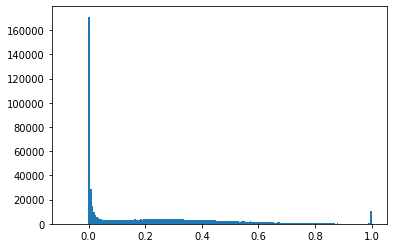

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------------------------------------------------------

plt.hist(cosine_vec, bins=200)
plt.show()

In [0]:
cosv = pd.DataFrame(cosine_vec,columns=['cosine'])

In [0]:
cosv.shape

(613890, 1)

In [0]:
print(cosv[cosv.cosine>=0.5].count()/cosv.shape[0])

cosine    0.146124
dtype: float64


In [0]:
cosv['Response'] = [1 if x >=0.5 else 0 for x in cosv['cosine']]

In [0]:
full_tfidf_normalized_write=full_tfidf_normalized.drop(['doc_id'], axis=1)
vocab_train_1 = pd.concat([full_tfidf_normalized_write, cosv['Response']], axis = 1, ignore_index=True, sort = False)

In [0]:
vocab_train_1.to_pickle("/content/drive/My Drive/New Data/vocab_train.pkl")

In [0]:
vocab_train_1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
613885,0.014769,-0.000492,0.008167,0.006659,-0.001936,-0.000359,0.005424,-0.003553,0.010137,0.003207,0.011838,0.007459,0.009915,-0.011115,0.000525,-0.006043,0.006380,-0.000973,0.004012,0.004242,0.003992,0.009264,-0.007321,0.016512,0.000705,-0.007354,0.008919,0.004740,-0.000722,0.010945,0.009903,-0.013727,0.018370,-0.002019,-0.005827,0.002341,-0.005356,-0.011937,0.010210,-0.006146,...,0.002372,-0.004555,-0.001456,-0.003725,-0.005024,0.001553,-0.001322,-0.001390,-0.000892,-0.004592,-0.011456,-0.005206,-0.006963,-0.001679,-0.001018,-0.002310,0.004934,-0.003371,0.000104,0.004604,0.000840,0.004434,-0.005564,-0.005372,0.006698,-0.006917,0.000371,-0.002666,-0.000411,-0.003848,-0.002929,-0.001293,0.005581,-0.003187,-0.003185,0.001172,0.005096,-0.005704,0.001992,0
613886,0.243952,-0.143189,-0.057538,0.026089,0.006166,-0.002020,0.006785,-0.020475,0.367784,-0.059344,-0.128438,-0.037698,0.001526,-0.003646,-0.020099,0.027855,-0.013878,-0.003132,-0.024064,-0.004174,-0.050335,0.002463,-0.020210,-0.015403,-0.014038,0.006281,-0.001640,-0.003898,-0.002705,-0.009850,-0.006467,-0.002679,0.004714,0.002354,-0.014960,0.003013,-0.004317,-0.011746,-0.004636,-0.004416,...,0.061569,-0.152726,0.062541,-0.003381,-0.013536,0.013469,0.006857,-0.015748,0.052781,0.104738,-0.039977,-0.092407,-0.061223,0.309002,-0.132729,0.078850,0.100753,0.002606,-0.148243,0.196984,0.143540,-0.037121,-0.029289,-0.096484,-0.066722,0.001359,-0.029651,0.069466,0.005175,0.077606,-0.019661,-0.015286,0.072922,0.016100,-0.007564,-0.021022,-0.005414,-0.006775,-0.047932,0
613887,0.108941,-0.006058,0.134698,0.123202,0.349717,-0.101183,-0.007647,-0.011614,-0.045946,-0.000600,-0.015205,0.002484,-0.003832,-0.017464,-0.002215,-0.016307,-0.013083,-0.017334,-0.003521,0.007941,-0.016980,0.021641,-0.023352,0.073243,0.014945,-0.015943,0.004910,0.003376,0.010874,0.035375,0.018057,-0.024220,0.007750,-0.040003,0.020321,-0.000729,0.005325,-0.028688,0.004456,-0.030543,...,0.000817,-0.005220,-0.008570,-0.004381,-0.000584,-0.001502,-0.001757,-0.001680,-0.004595,-0.006766,-0.010185,-0.003207,-0.004710,-0.000960,-0.001116,-0.000366,0.003701,-0.005146,-0.001512,-0.000105,0.005553,0.004606,-0.008564,-0.001008,0.007521,-0.001418,-0.000445,-0.004943,0.000104,-0.004928,-0.003034,-0.005795,0.001161,-0.004182,0.003345,-0.004524,0.002193,-0.002409,-0.002620,0
613888,0.118144,-0.013113,0.156017,0.137626,0.435580,-0.131435,-0.021687,-0.000735,-0.079702,0.004582,-0.037271,-0.018345,0.001146,-0.023610,-0.008852,-0.016091,-0.019692,-0.021114,-0.011088,-0.004694,-0.011870,0.018064,-0.004907,0.012228,-0.000476,-0.011232,0.002095,-0.011310,-0.005779,0.007711,0.002703,-0.007925,0.014142,0.004903,-0.007934,-0.001392,-0.003361,-0.010182,0.006055,-0.012136,...,0.002715,-0.003530,-0.002037,-0.004819,-0.002591,0.002362,-0.003271,0.000597,-0.002596,-0.007075,-0.016547,0.007424,-0.002693,-0.002947,-0.003080,0.001650,0.004582,-0.004440,-0.004408,-0.000462,0.003403,-0.004151,-0.002345,-0.002042,0.011726,-0.006085,-0.000613,0.001988,0.003450,-0.003454,0.002110,-0.006318,0.002654,0.012458,0.000908,0.000619,-0.000661,-0.000854,0.000882,0
613889,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000

In [0]:
vocab_train_1[200].head()

0    0
1    0
2    0
3    0
4    0
Name: 200, dtype: int64